# Monte Carlo simulation

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

In [3]:
import datetime
import pandas_datareader as pdr
import datetime
import yfinance as yf
%matplotlib inline

## Show historical TSLA stock price

In [4]:
start_date=datetime.datetime(2017,11,28)
end_date=datetime.datetime(2023,11,28)
tickers = 'TSLA'
prices = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
historical = prices['Adj Close'].dropna(how='all')
historical

Date
2017-11-28     21.170000
2017-11-29     20.502666
2017-11-30     20.590000
2017-12-01     20.435333
2017-12-04     20.346666
                 ...    
2023-11-20    235.600006
2023-11-21    241.199997
2023-11-22    234.210007
2023-11-24    235.449997
2023-11-27    236.080002
Name: Adj Close, Length: 1509, dtype: float64

In [6]:
ret = historical.pct_change()[1:] #daily returns for the month
ret

Date
2017-11-29   -0.031523
2017-11-30    0.004260
2017-12-01   -0.007512
2017-12-04   -0.004339
2017-12-05   -0.004915
                ...   
2023-11-20    0.005548
2023-11-21    0.023769
2023-11-22   -0.028980
2023-11-24    0.005294
2023-11-27    0.002676
Name: Adj Close, Length: 1508, dtype: float64

In [7]:
days = len(ret)
sample_mean_tsla = np.mean(ret)
sample_std_tsla = np.std(ret, ddof=1)

sample_mean_tsla,sample_std_tsla

(0.0024043663221886644, 0.040156388904390154)

In [8]:
sample_variance_tsla=sample_std_tsla**2
sample_variance_tsla

0.0016125355698406287

In [9]:
lastPrice= S0 = historical.iloc[-1]
S0

236.0800018310547

## Monte Carlo Simulation

In [10]:
def monte_carlo_option_price(S, K, r, T, vol, num_simulations):
    dt = 1/252  # Time step, assuming 252 trading days
    num_days = int(T * 252)  # Number of days until expiration

    simulated_prices = np.zeros((num_simulations, num_days))

    for i in range(num_simulations):
        price_path = np.zeros(num_days )
        price_path[0] = S

        for day in range(1, num_days):
            drift = (r - 0.5 * vol ** 2) * dt
            diffusion = vol * np.sqrt(dt) * np.random.normal(0, 1)
            price_t = price_path[day - 1] * np.exp(drift + diffusion)
            price_path[day] = price_t

        simulated_prices[i, :] = price_path

    option_payoffs = np.maximum(simulated_prices[:, -1] - K, 0)  # Payoff at expiration
    option_price = np.exp(-r * T) * np.mean(option_payoffs)

    return option_price, simulated_prices

In [14]:
# Option parameters
S = S0  # Current stock price
K = 260  # Strike price
r = 0.05045  # Risk-free interest rate
T = 1  # Time to expiration (in years)
vol = sample_std_tsla  # Volatility
num_simulations = 1000 # Number of Monte Carlo simulations

#potremmo definire diversamente il tempo, per esempio possiamo valutare sempre opzioni di un anno e dividere il numero di giorni per il numero di step in cui puoi ricattare l'opzione

In [15]:
# European Call Option Price with Monte Carlo Simulation
option_price, price_paths = monte_carlo_option_price(S, K, r, T, vol, num_simulations)

# Stampa del prezzo dell'opzione e visualizzazione dei path
print("Option price:", option_price)



Option price: 0.5250372590625548


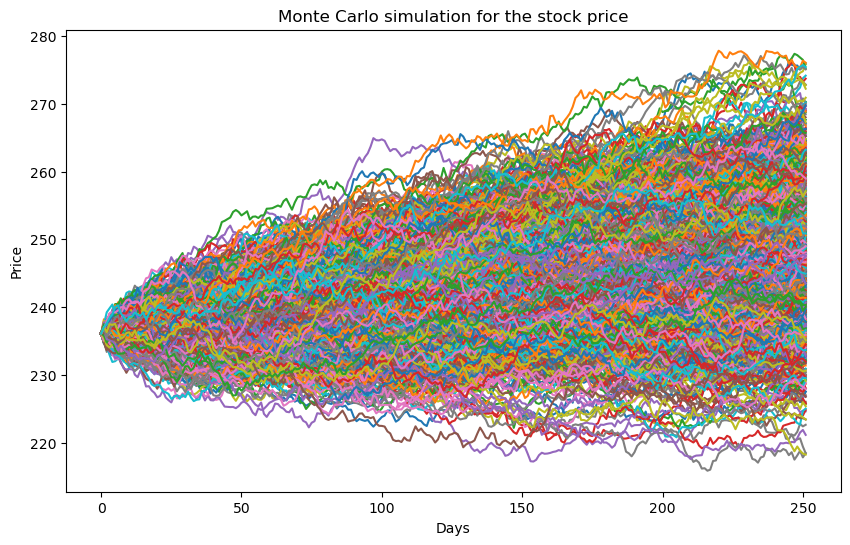

In [13]:
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(price_paths[i, :], label=f'Simulation {i + 1}')

plt.title('Monte Carlo simulation for the stock price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()